In [1]:
from math import *
import cmath
import matplotlib.pyplot as plt

In [2]:
def db_from_lin(gain):
    return log(gain, 10.0) * 20.0


def lin_from_db(decibels):
    return pow(10.0, decibels * 0.05)

\begin{align*}
  |H(\omega)| = \frac{\omega_c}{j \omega + \omega_c}
\end{align*}


In [3]:
def first_order_bode_low_pass(f_hz, f_cutoff_hz):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = f_cutoff_hz * pi * 2.0
    h = wc / (jw + wc)
    return abs(h)

First order low pass filter with cutoff at 2kHz

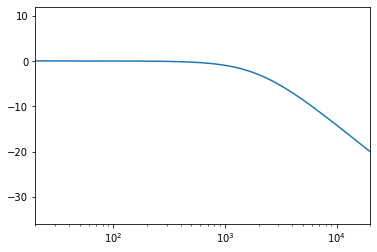

In [4]:
cutoff_hz = 2000

amplitude = []
x = []
for i in range(20, 20000, 10):
    n = first_order_bode_low_pass(i, cutoff_hz)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)


\begin{align*}
  |H(\omega)| = \frac{\omega_c^2}{j \omega^2 + j \omega(\omega_c / Q) + \omega_c^2}
\end{align*}


In [5]:
def second_order_bode_low_pass(f_hz, f_cutoff_hz, q_factor):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = pi * 2.0 * f_cutoff_hz
    h = wc ** 2 / (jw ** 2 + jw * (wc / q_factor) + wc ** 2)
    return abs(h)

Second order low pass filter with cutoff at 1kHz, Q of 2

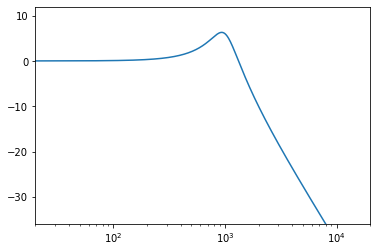

In [6]:
data = []
x = []
for i in range(20, 20000, 10):
    n = second_order_bode_low_pass(i, 1000, 2)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)


\begin{align*}
  |H(\omega)| = \frac{j \omega}{j \omega + \omega_c}
\end{align*}


In [7]:
def first_order_bode_high_pass(f_hz, f_cutoff_hz):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = f_cutoff_hz * pi * 2.0
    h = jw / (jw + wc)
    return abs(h)

First order high pass filter with cutoff at 2kHz

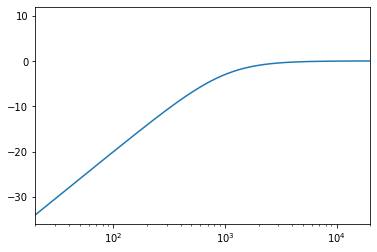

In [8]:
data = []
x = []
for i in range(20, 20000, 10):
    n = first_order_bode_high_pass(i, 1000)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)

\begin{align*}
  |H(\omega)| = \frac{j \omega^2}{j \omega^2 + j \omega(\omega_c / Q) + \omega_c^2}
\end{align*}


In [9]:
def second_order_bode_high_pass(f_hz, f_cutoff_hz, q_factor):
    jw = pi * 2.0 * f_hz * 1.0j
    wc = pi * 2.0 * f_cutoff_hz
    h = jw ** 2 / (jw ** 2 + jw * (wc / q_factor) + wc ** 2)
    return abs(h)

Second order high pass filter with cutoff at 1kHz, Q of 2

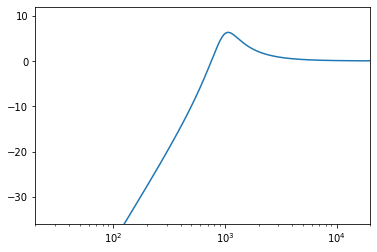

In [10]:
data = []
x = []
for i in range(20, 20000, 10):
    n = second_order_bode_high_pass(i, 1000, 2)
    data.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, data)

General biquad first order bode plot

In [22]:
def first_order_biquad_bode(f_hz, biquad_coefs, sampleRate):
    a0 = biquad_coefs[3]
    b0, b1, b2, a0, a1, a2 = [x / a0 for x in biquad_coefs]

    jw = cmath.exp(-(pi * 2.0) * f_hz * 1.0j / sampleRate)

    numerator = (b0 * 1) + (b1 * jw) + (b2 * jw**2)
    denominator = (a1 * jw) + (a2 * jw ** 2) + 1.0

    return abs(numerator / denominator)

Peaking biquad

In [ ]:
def biquad_peaking(f_cutoff_hz, q_value, gain, sampleRate):
    omega = 2.0 * pi * f_cutoff_hz / sampleRate

    alpha = sin(omega) / (2.0 * q_value)

    b0 =  1 + alpha * gain
    b1 = -2 * cos(omega)
    b2 =  1 - alpha * gain
    a0 =  1 + alpha / gain
    a1 =  b1
    a2 =  1 - alpha / gain
    return b0, b1, b2, a0, a1, a2

First order peaking filter with cutoff at 1kHz, Q of 3 at -9.0dB


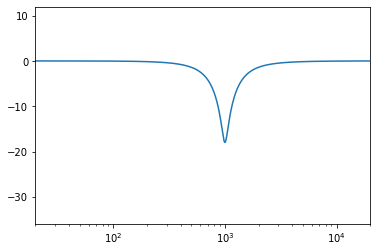

In [23]:
amplitude = []
x = []
for i in range(20, 20000, 10):
    biquad_coefs = biquad_peaking(1000, 3, lin_from_db(-9.0), 96000)
    n = first_order_biquad_bode(i, biquad_coefs, 96000)
    amplitude.append(db_from_lin(n.real))
    x.append(i)

plt.xlim([20, 20000])
plt.ylim([-36, 12])
plt.semilogx(x, amplitude)